## PROJECT 4: LondonAirBNB

> ### TASK: Study linear regression with TensorFlow
> 

### Project goals and objectives

#### Project goal

- Studying **Linear Regression with TensorFlow**

#### Project objectives

1. Explore and prepare data 
2. Build linear regression model with subclassing API

### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
plt.style.use('seaborn')


from collections import Counter

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

### LOAD DATA

In [2]:
# Path to data
data_path = "data/vishal_final.csv"

In [3]:
# Create dataframe
data_df = pd.read_csv(data_path)

# Check result 
data_df.head().T

,0,1,2,3,4
id,11551,13913,15400,17402,17506
experiences_offered,family,business,romantic,none,business
host_response_time,within an hour,unknown,within a day,within an hour,other
host_acceptance_rate,100.0,89.0,83.0,96.0,NaN
host_is_superhost,0,0,0,0,0
host_has_profile_pic,1,1,1,1,1
host_identity_verified,1,1,1,1,0
neighbourhood_cleansed,20,23,31,32,28
country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom
is_location_exact,1,1,1,0,1


## EXPLORATORY DATA ANALISIS

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83689 entries, 0 to 83688
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           83689 non-null  int64  
 1   experiences_offered          83689 non-null  object 
 2   host_response_time           83689 non-null  object 
 3   host_acceptance_rate         60531 non-null  float64
 4   host_is_superhost            83689 non-null  int64  
 5   host_has_profile_pic         83689 non-null  int64  
 6   host_identity_verified       83689 non-null  int64  
 7   neighbourhood_cleansed       83689 non-null  int64  
 8   country                      83689 non-null  object 
 9   is_location_exact            83689 non-null  int64  
 10  property_type                83689 non-null  object 
 11  room_type                    83689 non-null  object 
 12  accommodates                 83689 non-null  int64  
 13  bathrooms       

In [5]:
data_df.shape

(83689, 49)

### Distribution of the target variables

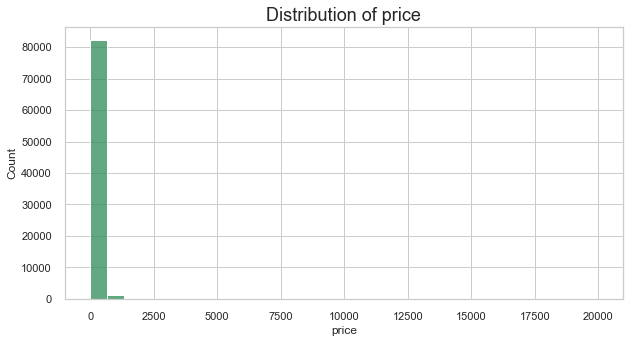

In [6]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.histplot(data=data_df, x="price", color="seagreen", bins=30)
plt.title("Distribution of price", fontsize=18);

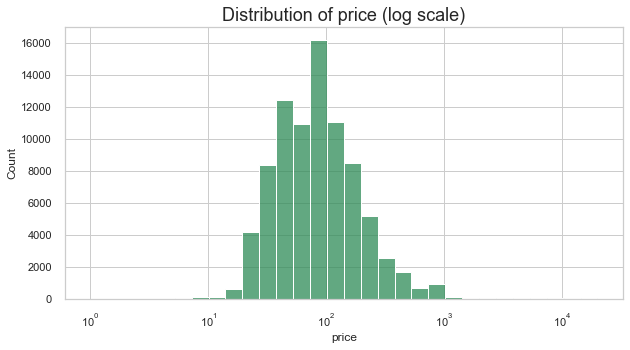

In [7]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.histplot(data=data_df, x="price", color="seagreen", log_scale=True, bins=30)
plt.title("Distribution of price (log scale)", fontsize=18);

## Variable Types

In [8]:
data_df["country"].nunique()

1

In [9]:
data_df = data_df.drop(['country','lastreviewdays','firstreviewdays','id'], axis=1)
data_df.shape

(83689, 45)

In [10]:
# Identify the categorical variables
cat_vars = [var for var in data_df.columns if data_df[var].dtype == 'O']

# Number of categorical variables
print(f' Number of categorical variables: {len(cat_vars)}')
cat_vars

 Number of categorical variables: 6


['experiences_offered',
 'host_response_time',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy']

In [11]:
# Identify the the discrete variables
discrete_vars = [var for var in data_df.columns if len(data_df[var].unique()) < 20  and var not in cat_vars]

# Number of discrete variables
print('Number of discrete variables: ', len(discrete_vars))
discrete_vars

Number of discrete variables:  20


['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'is_location_exact',
 'accommodates',
 'bedrooms',
 'has_availability',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'requires_license',
 'instant_bookable',
 'is_business_travel_ready',
 'week_book',
 'month_book',
 'security',
 'premium']

In [12]:
# Identify the the numerical variables
num_vars = [var for var in data_df.columns if var not in cat_vars and var not in discrete_vars]

# Number of numerical variables
print(f' Number of numerical variables: {len(num_vars)}')
num_vars

 Number of numerical variables: 19


['host_acceptance_rate',
 'neighbourhood_cleansed',
 'bathrooms',
 'beds',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'reviews_per_month',
 'amenity_sum',
 'distance']

### Missing values

In [13]:
 # List of the variables that contain missing values
vars_with_na = [var for var in data_df.columns if data_df[var].isnull().sum() > 0]

# Percentage of missing values
data_df[vars_with_na].isnull().mean().sort_values(ascending=False)

host_acceptance_rate           0.276715
review_scores_checkin          0.021138
review_scores_value            0.021126
review_scores_location         0.021114
review_scores_accuracy         0.020552
review_scores_communication    0.020528
review_scores_cleanliness      0.020433
review_scores_rating           0.019835
beds                           0.011722
bedrooms                       0.001924
bathrooms                      0.001553
dtype: float64

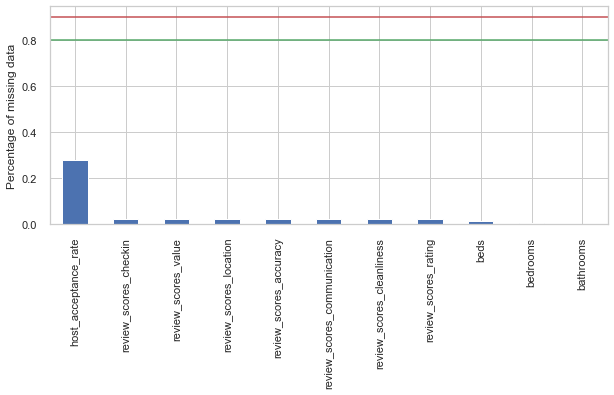

In [14]:
data_df[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

### Numerical variables

In [15]:
# Descriptive statistics
data_df[num_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
host_acceptance_rate,60531.0,82.082602,26.438192,0.000000,75.000000,95.000000,100.000000,100.000000
neighbourhood_cleansed,83689.0,21.764760,7.956647,0.000000,18.000000,23.000000,29.000000,32.000000
bathrooms,83559.0,1.308231,0.621926,0.000000,1.000000,1.000000,1.500000,35.000000
beds,82708.0,1.739965,1.295825,0.000000,1.000000,1.000000,2.000000,50.000000
price,83689.0,127.552139,282.354052,1.000000,46.000000,81.000000,139.000000,19970.000000
security_deposit,83689.0,125.773053,281.856948,0.000000,0.000000,0.000000,200.000000,17950.000000
cleaning_fee,83689.0,31.753241,43.151763,0.000000,0.000000,20.000000,50.000000,1000.000000
guests_included,83689.0,1.607117,1.365081,1.000000,1.000000,1.000000,2.000000,46.000000
extra_people,83689.0,7.393481,14.304767,0.000000,0.000000,0.000000,10.000000,247.000000
availability_30,83689.0,4.907646,5.507615,0.000000,0.000000,0.000000,11.000000,30.000000


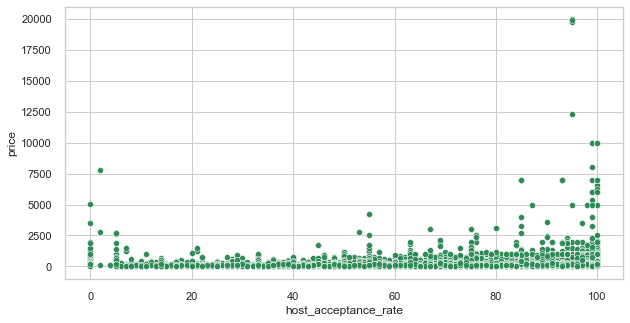

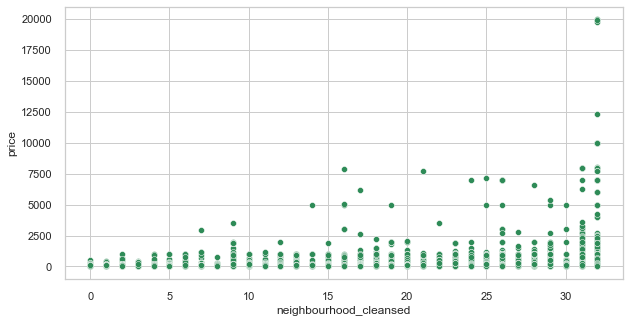

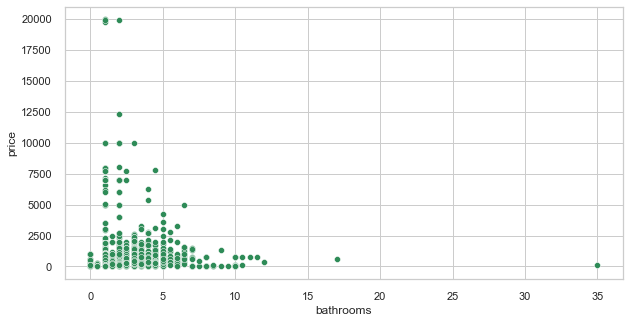

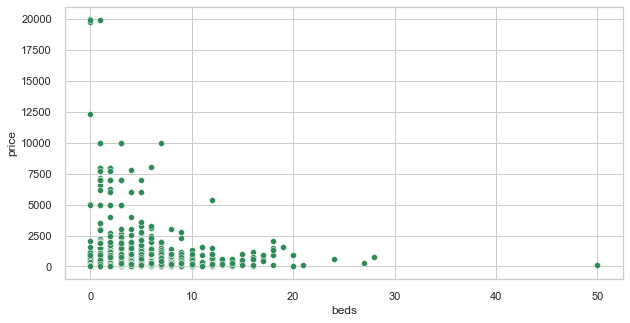

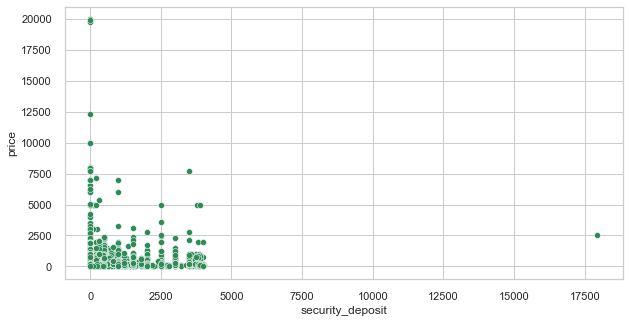

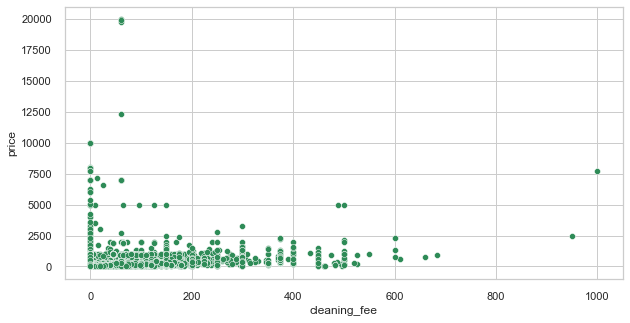

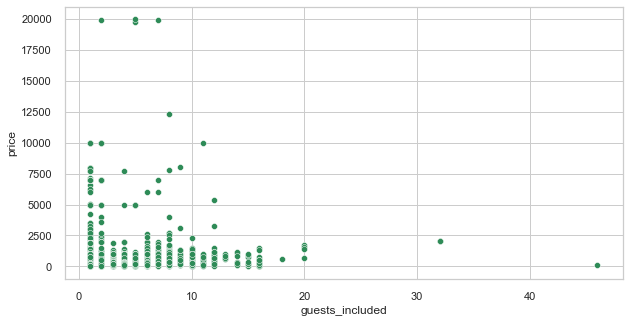

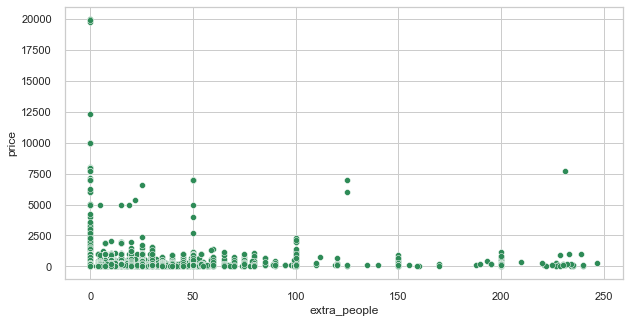

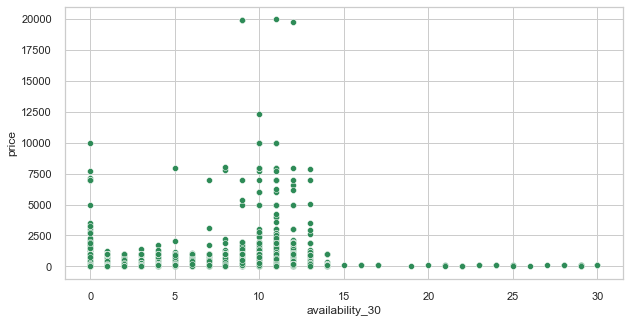

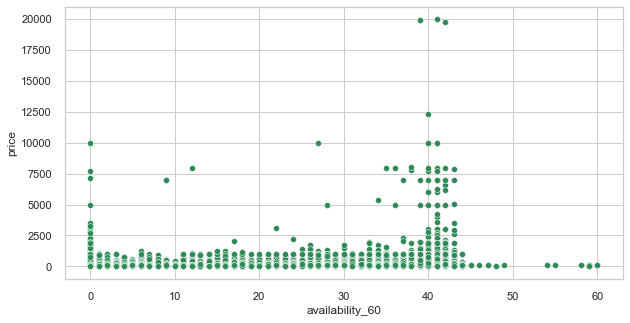

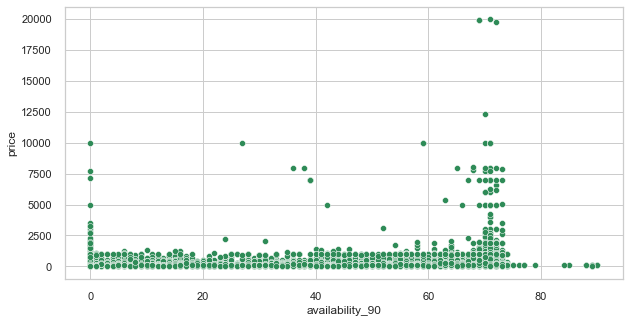

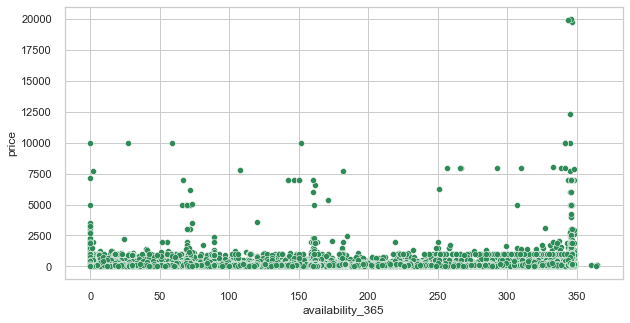

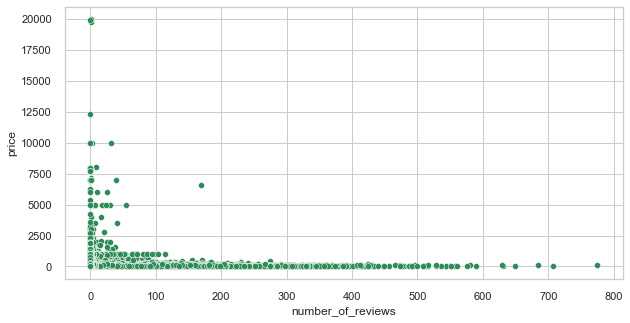

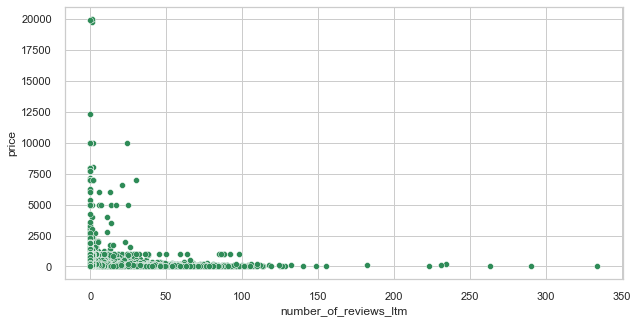

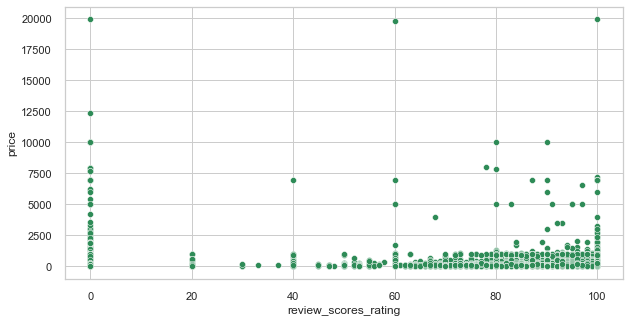

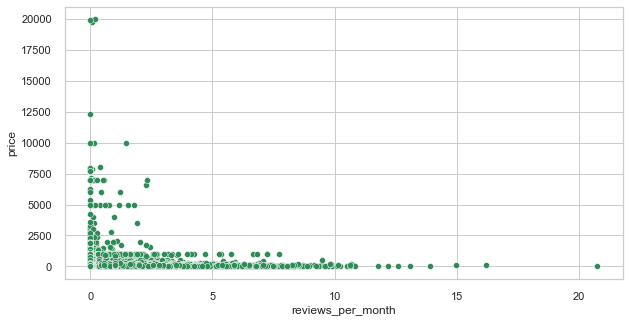

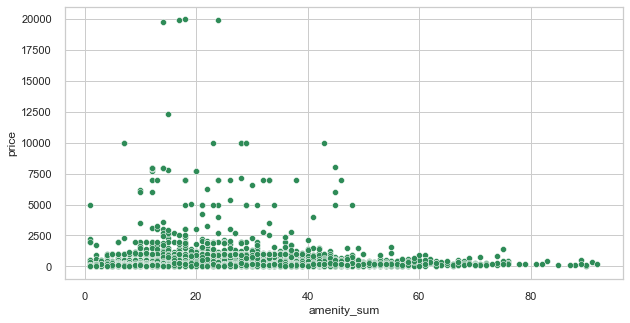

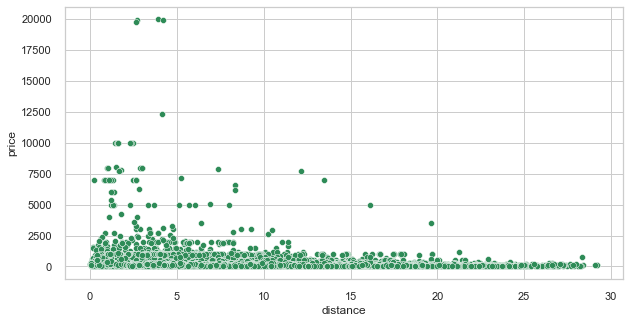

In [16]:
for var in data_df[num_vars]:
    if var !="price":
        sns.scatterplot(data=data_df[num_vars], x=var, y="price", color="seagreen")
        plt.show()

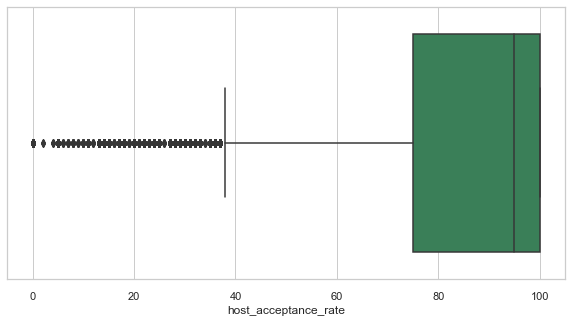

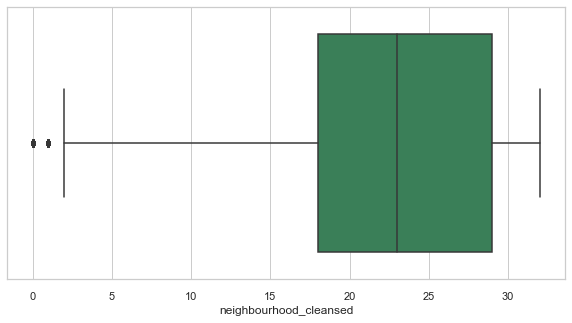

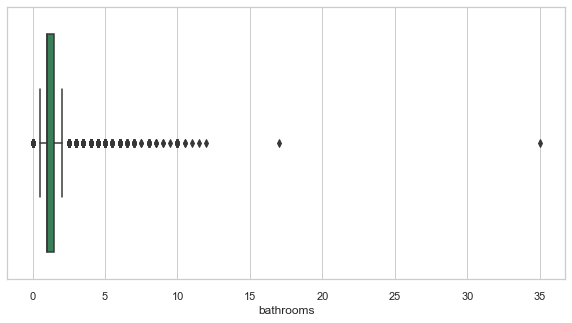

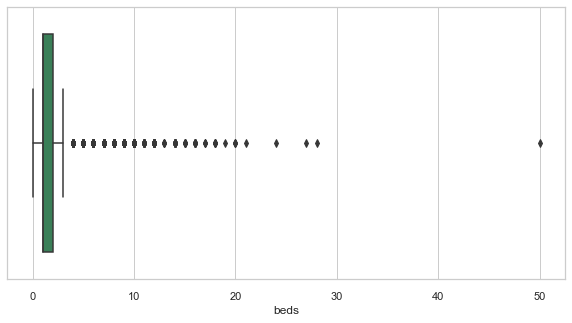

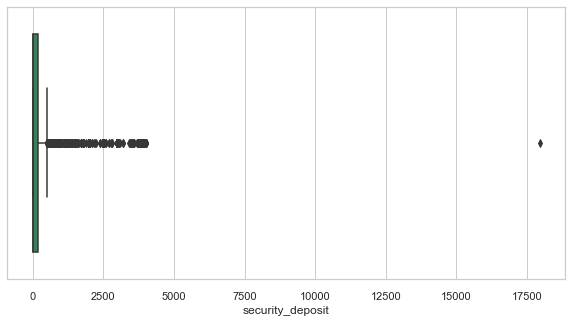

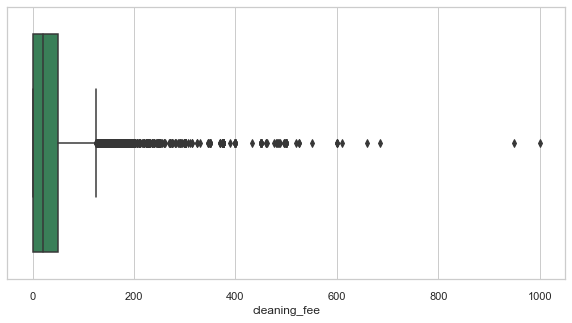

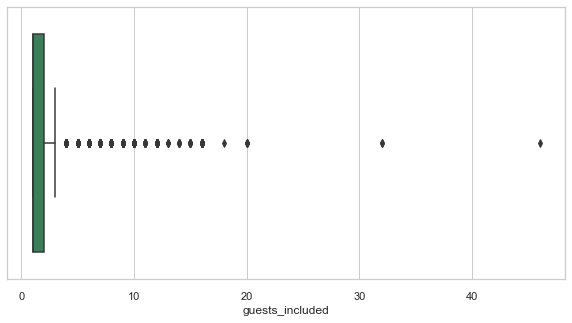

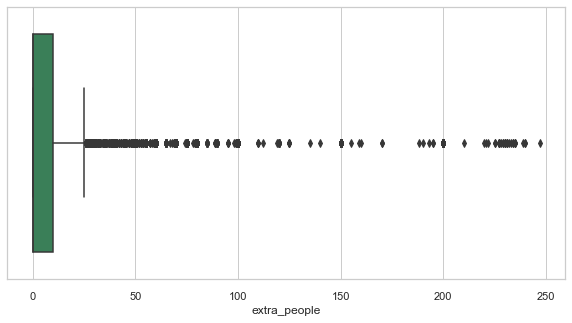

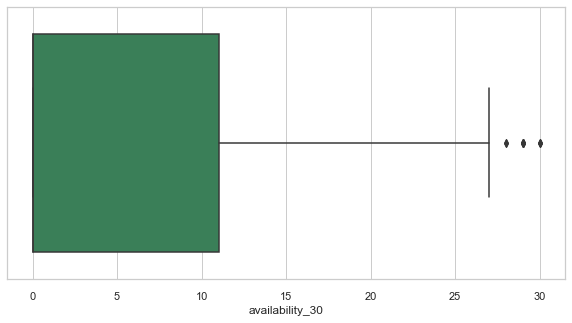

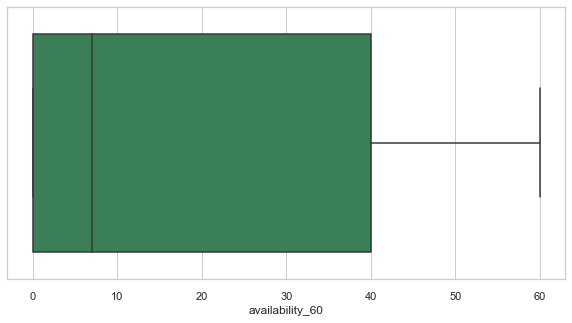

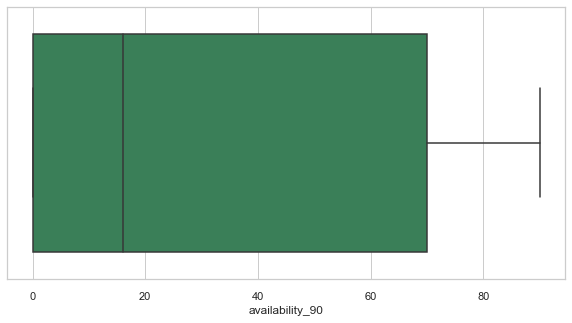

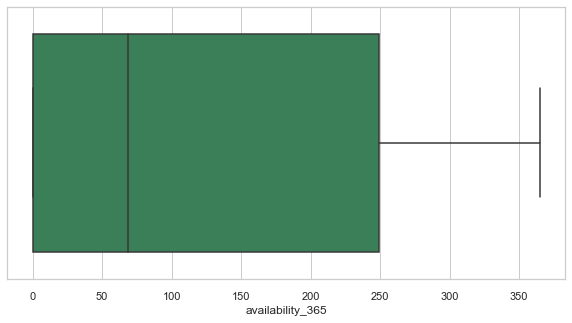

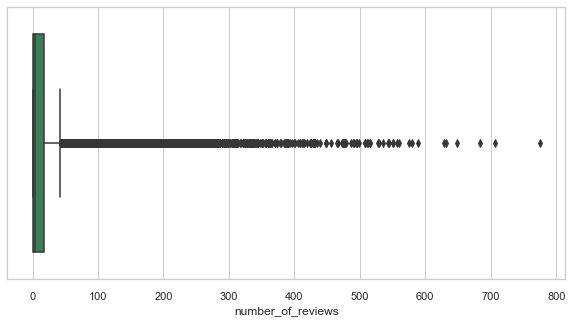

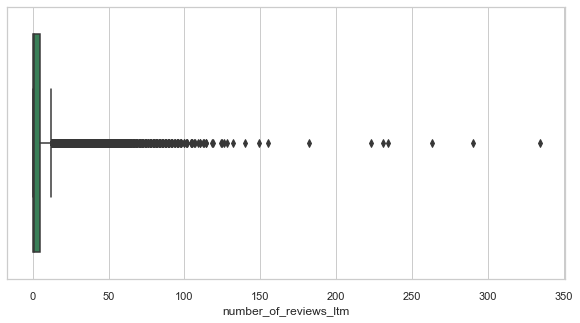

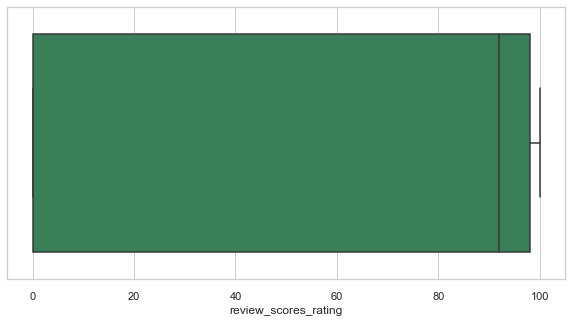

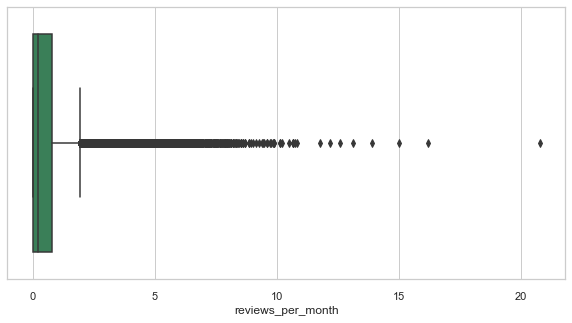

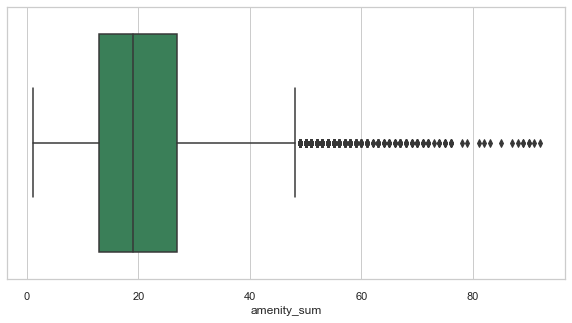

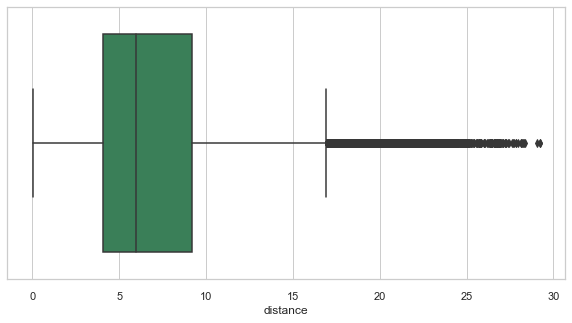

In [17]:
for var in data_df[num_vars]:
    if var !="price":
        sns.boxplot(data=data_df[num_vars], x=var,  color="seagreen")
        plt.show()

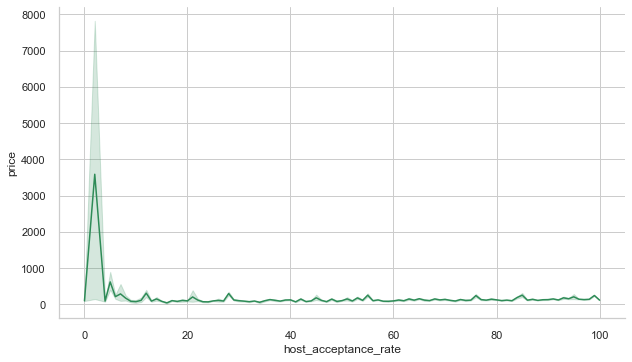

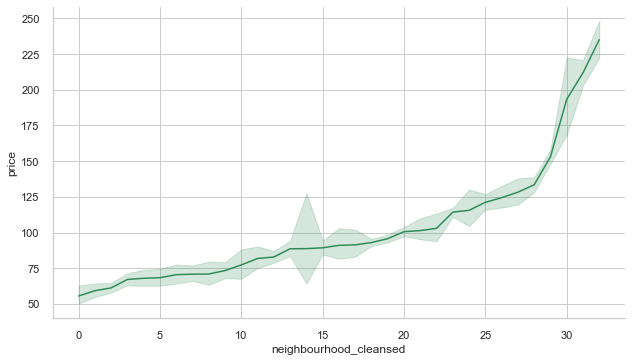

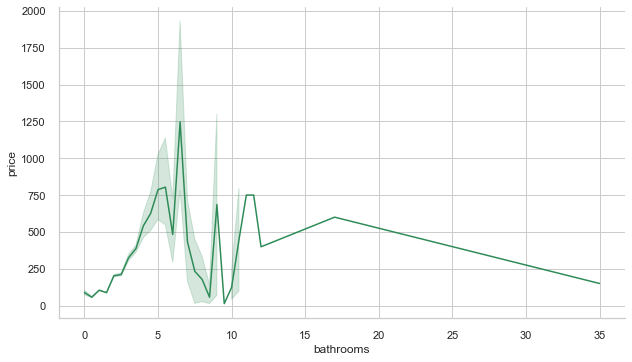

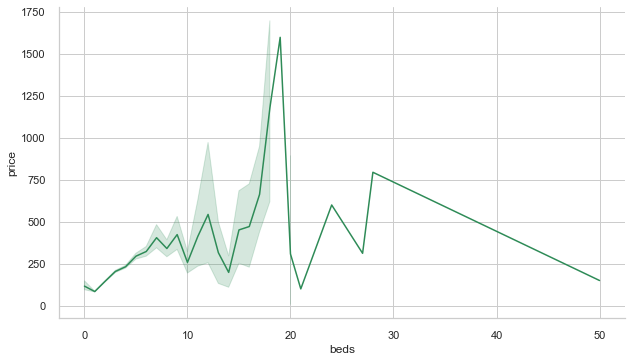

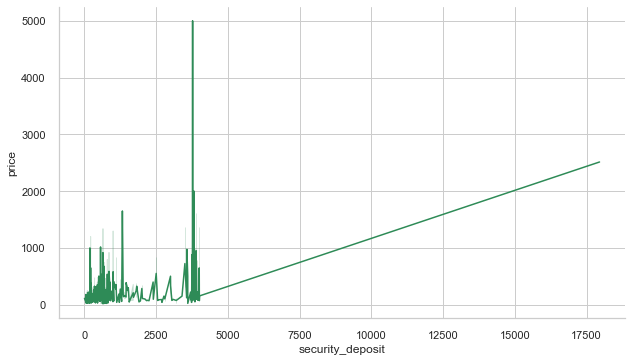

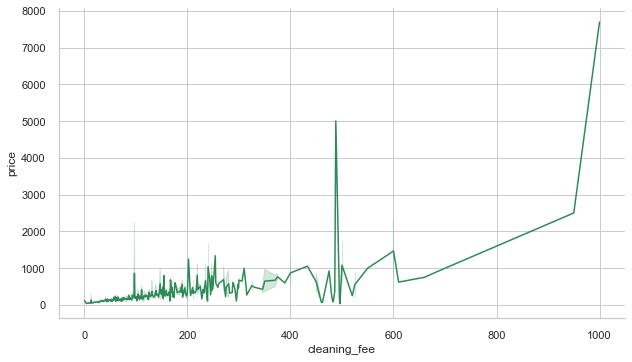

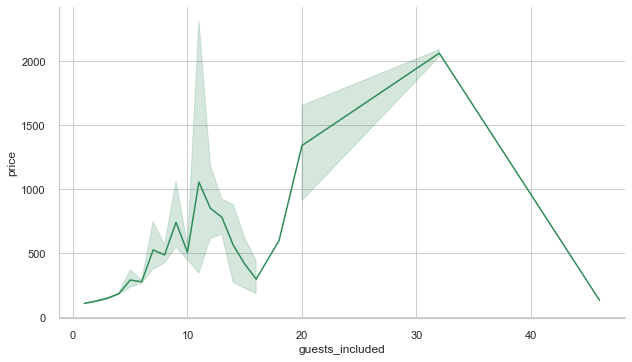

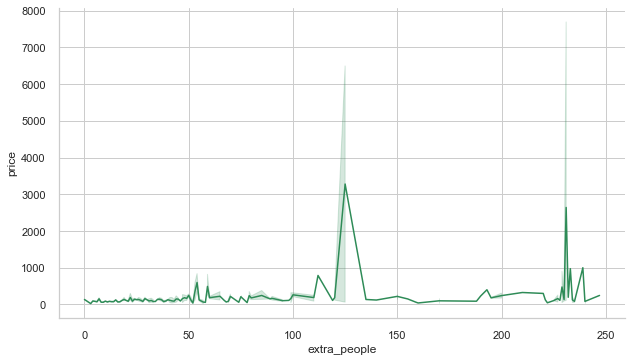

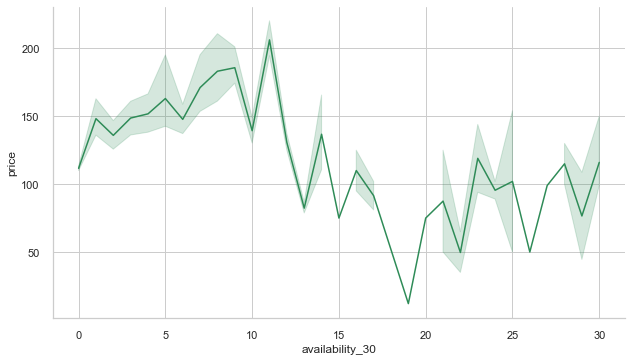

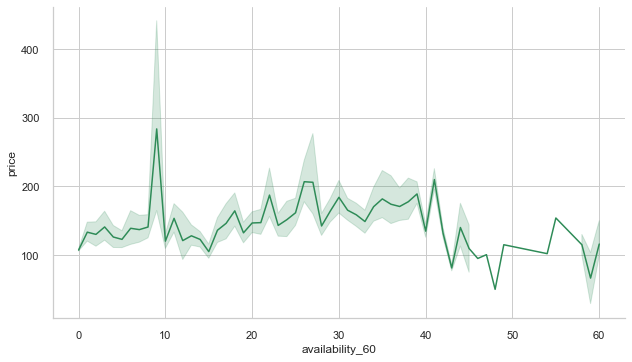

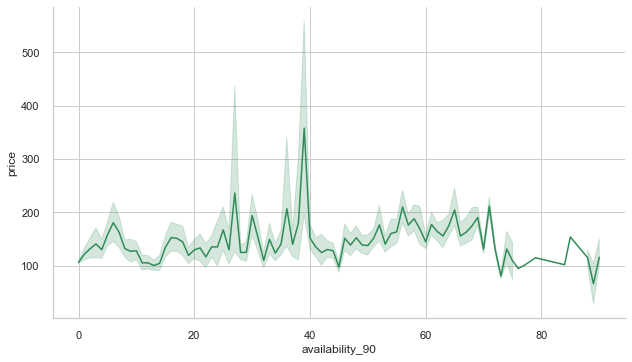

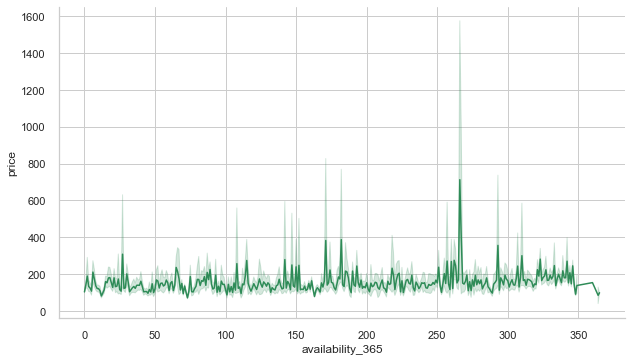

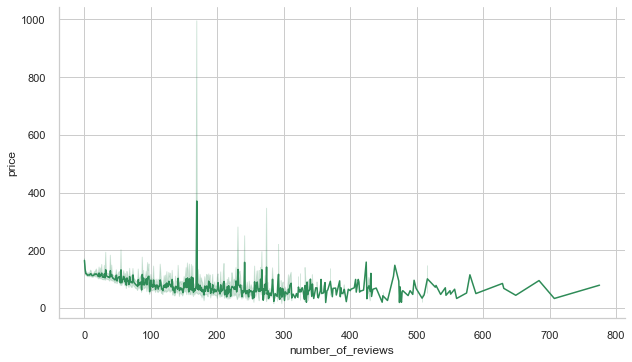

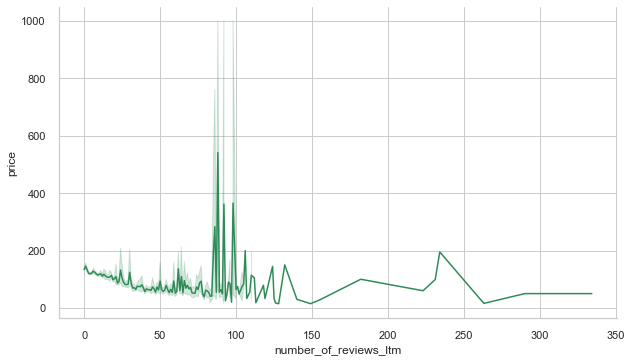

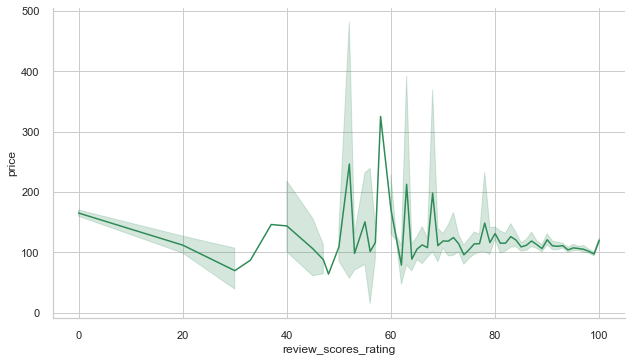

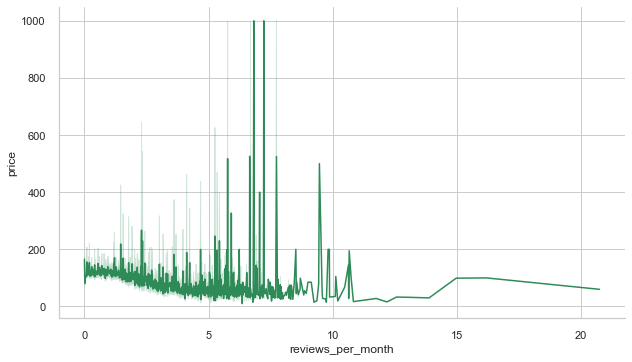

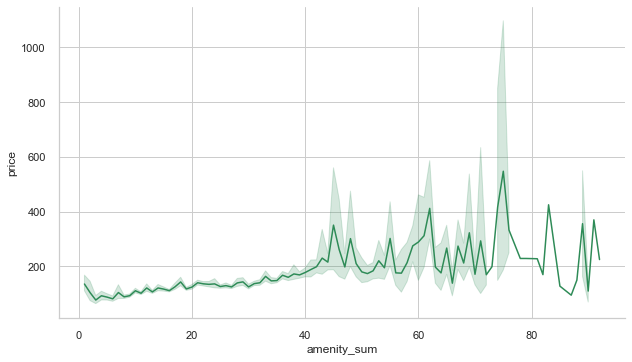

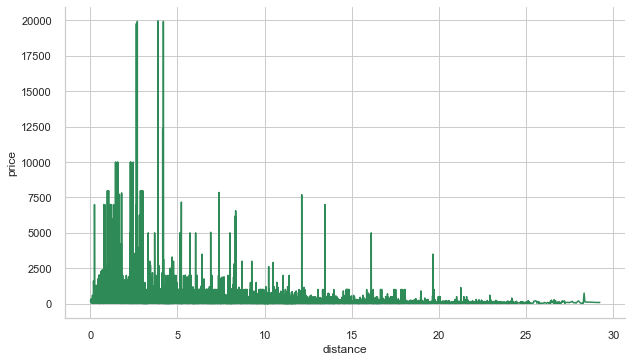

In [18]:
for var in data_df[num_vars]:
    if var !="price":
        sns.relplot(data=data_df[num_vars], x=var, y="price",  kind="line", color="seagreen", height=5, aspect=1.75)
        plt.show()

### Discrete variables

In [19]:
data_df[discrete_vars].head().T

,0,1,2,3,4
host_is_superhost,0.0,0.0,0.0,0.0,0.0
host_has_profile_pic,1.0,1.0,1.0,1.0,1.0
host_identity_verified,1.0,1.0,1.0,1.0,0.0
is_location_exact,1.0,1.0,1.0,0.0,1.0
accommodates,4.0,2.0,2.0,6.0,2.0
bedrooms,1.0,1.0,1.0,3.0,1.0
has_availability,1.0,1.0,1.0,1.0,1.0
review_scores_accuracy,9.0,10.0,10.0,10.0,0.0
review_scores_cleanliness,9.0,10.0,10.0,9.0,0.0
review_scores_checkin,10.0,10.0,10.0,9.0,0.0


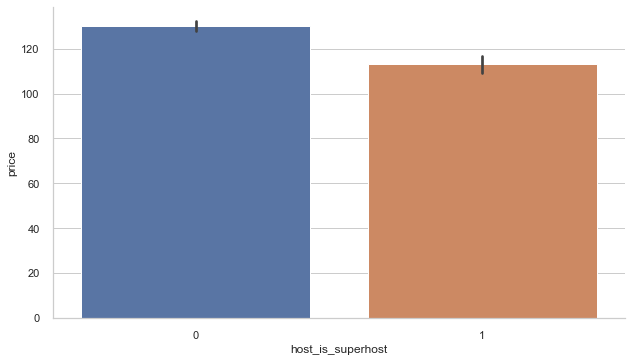

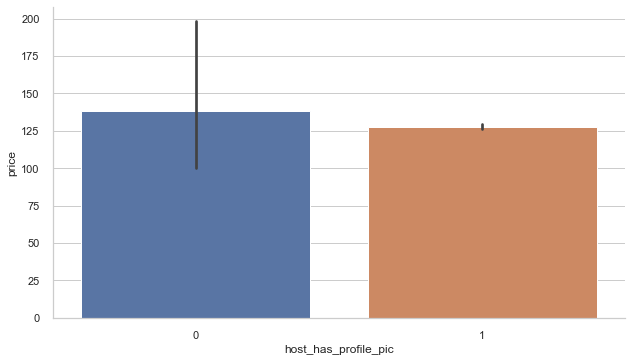

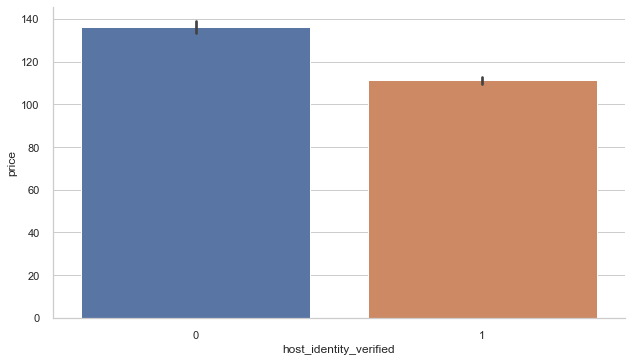

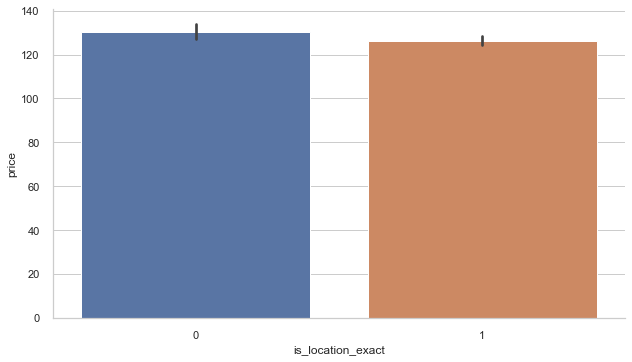

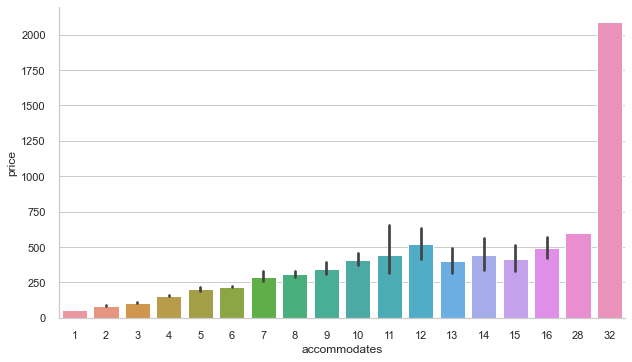

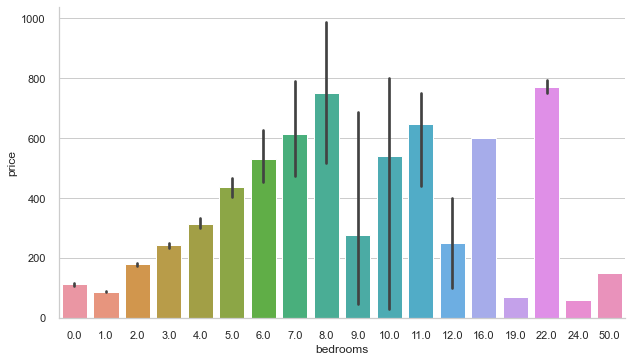

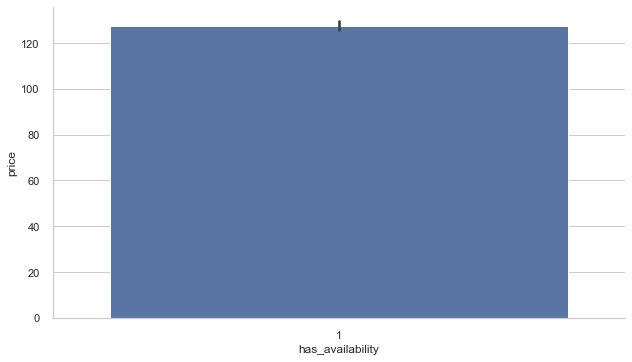

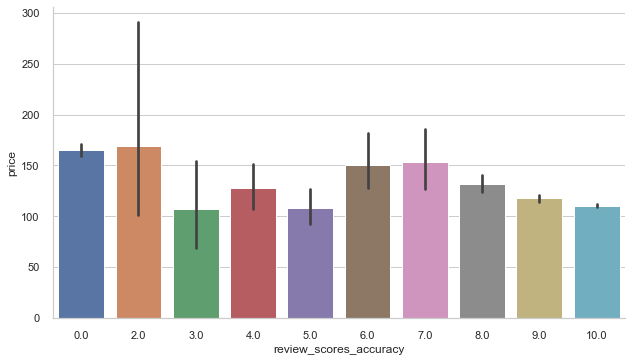

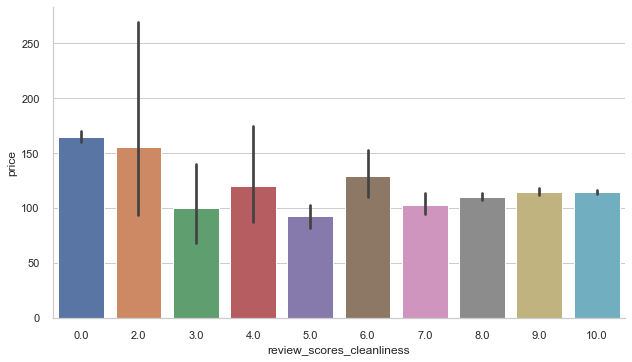

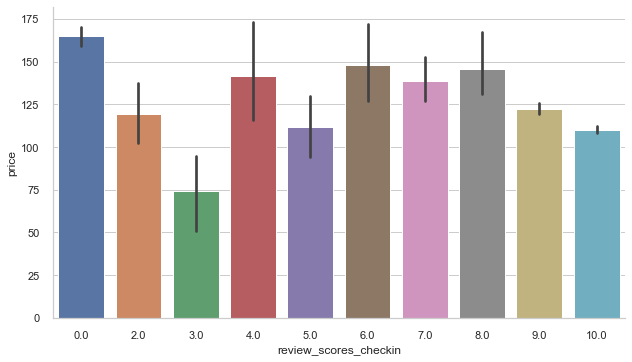

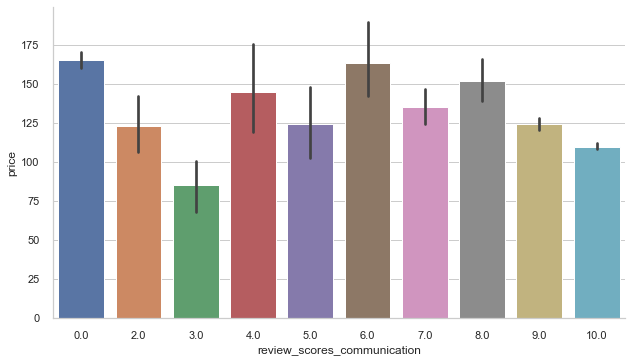

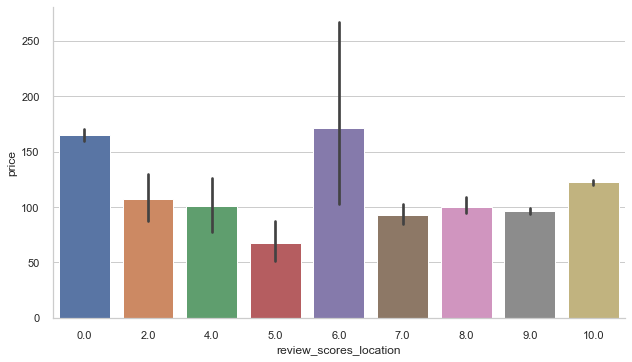

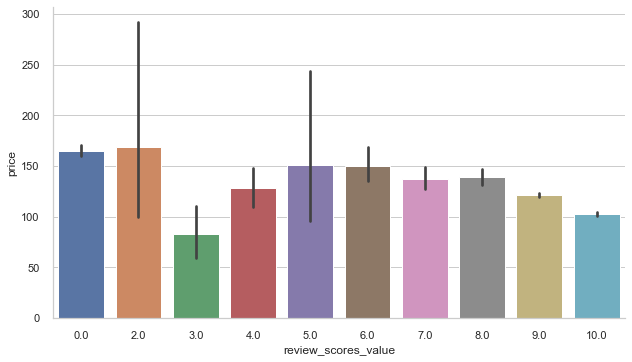

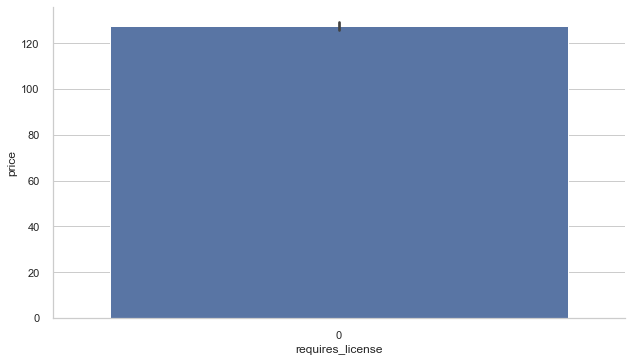

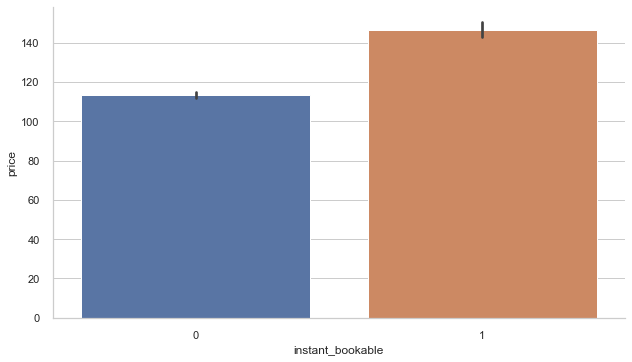

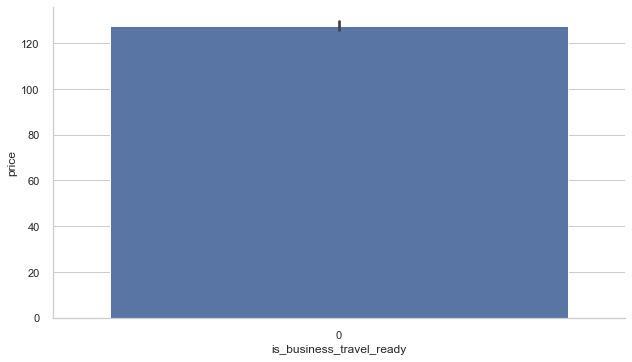

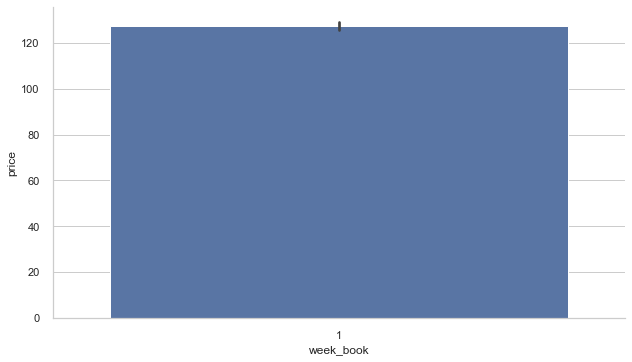

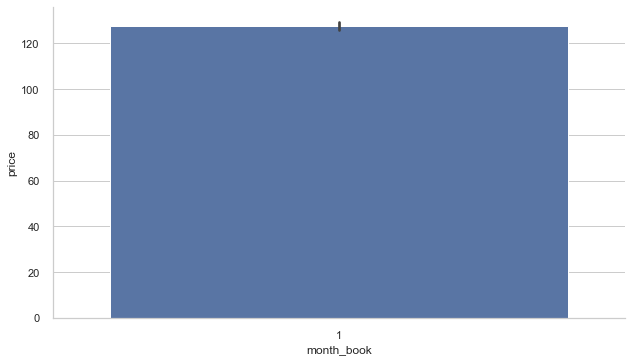

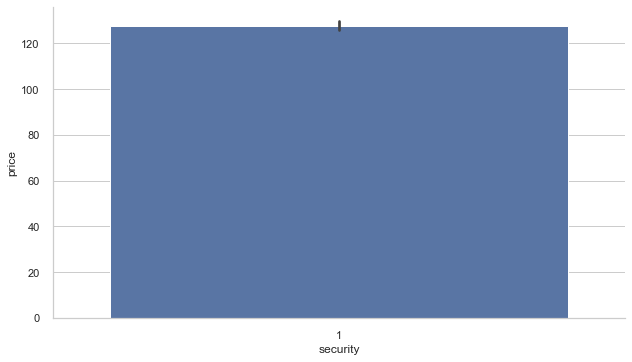

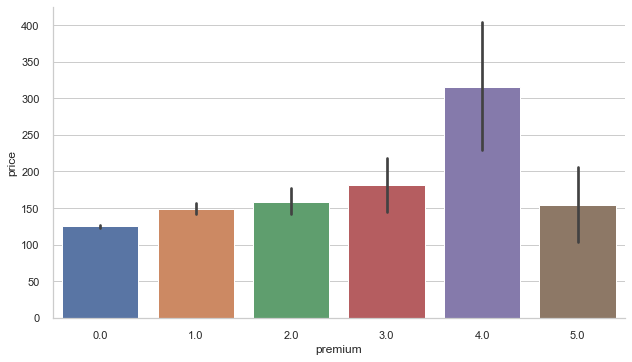

In [20]:
for var in discrete_vars:
    sns.catplot(x=var, y='price', data=data_df, kind="bar", height=5, aspect=1.75)
    plt.show()

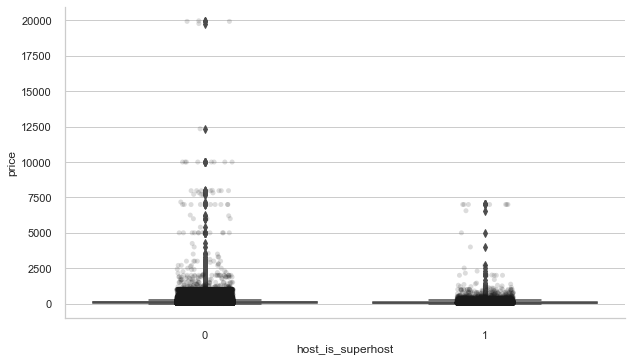

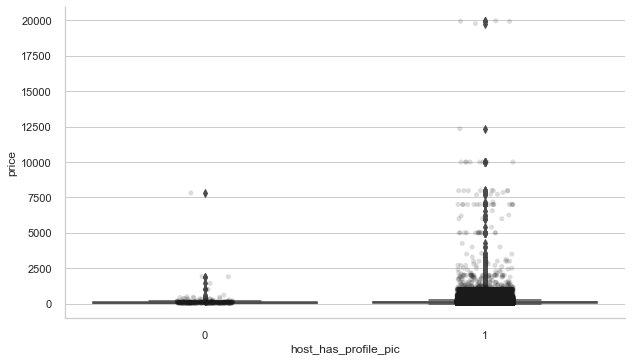

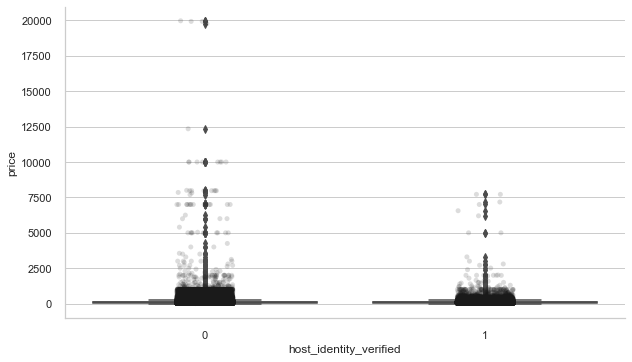

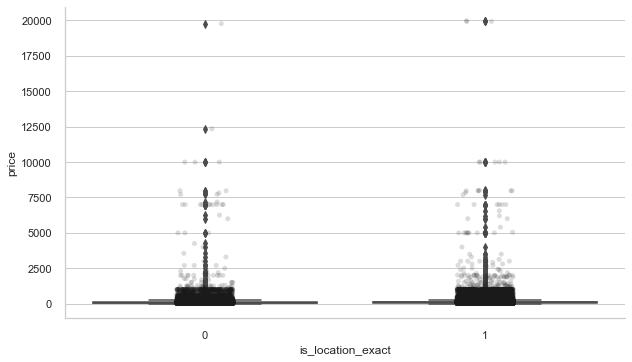

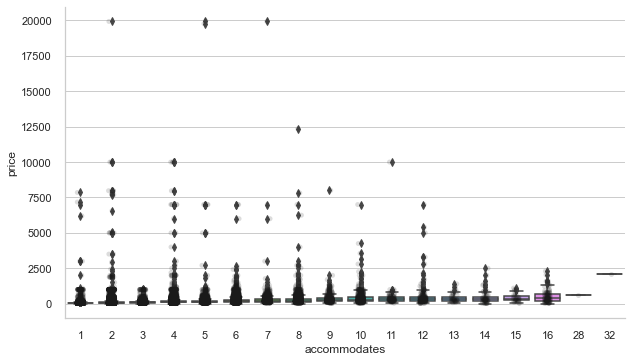

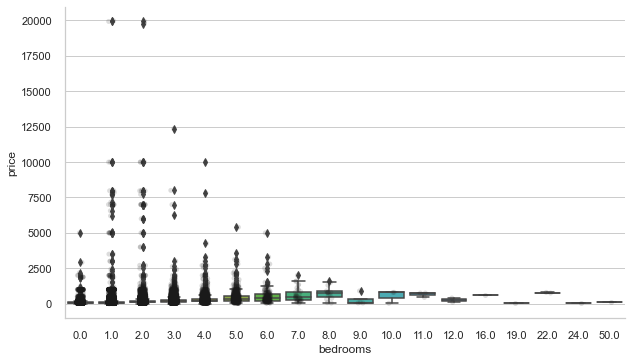

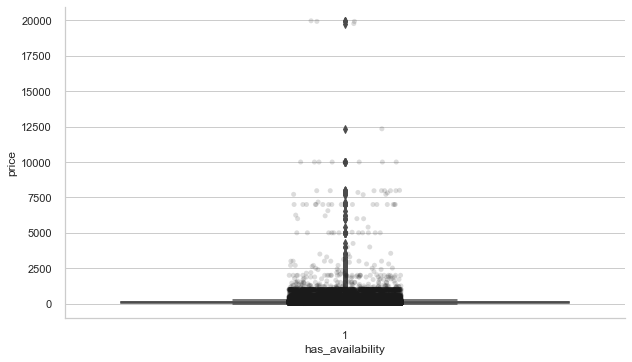

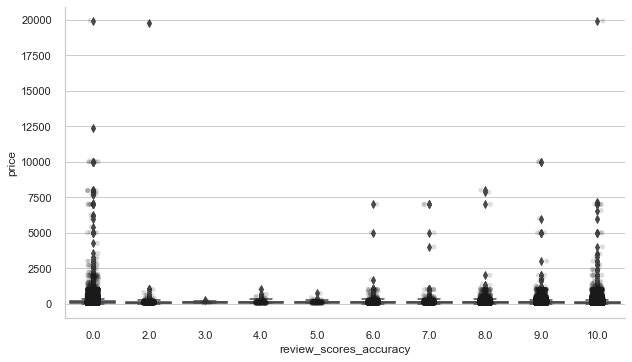

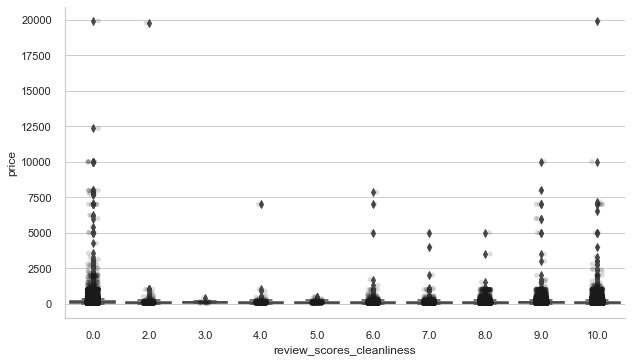

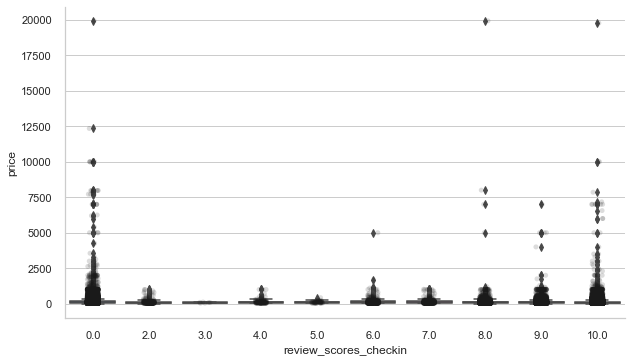

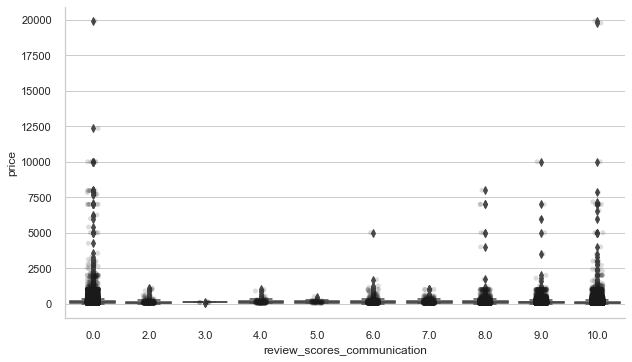

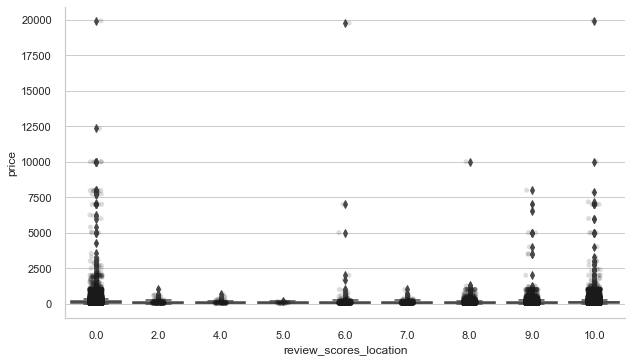

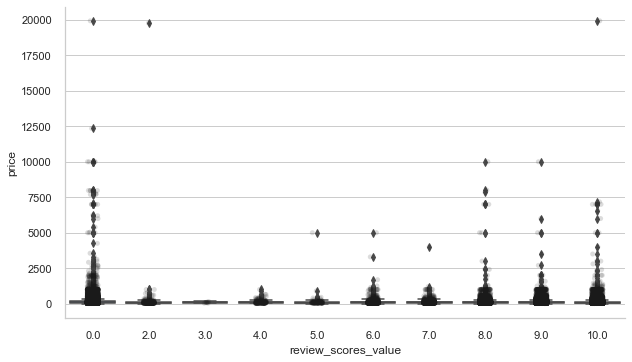

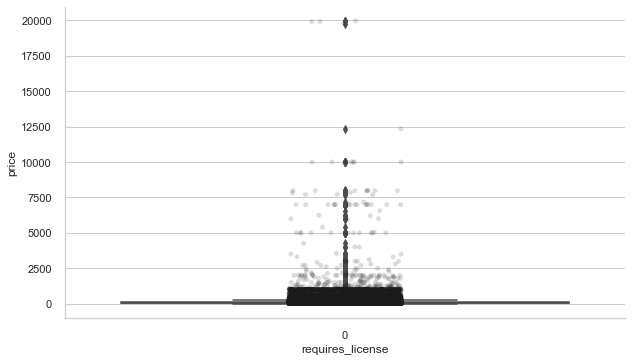

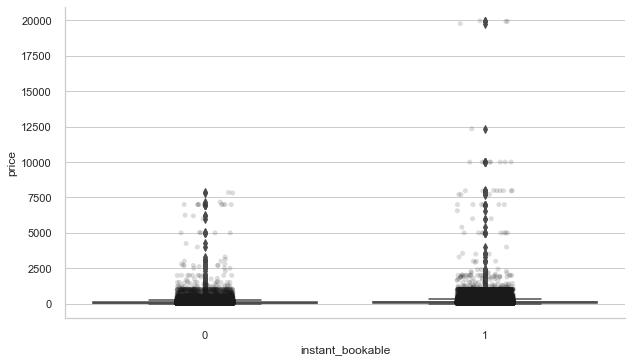

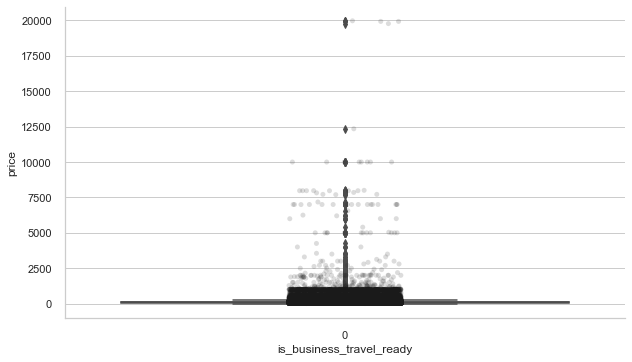

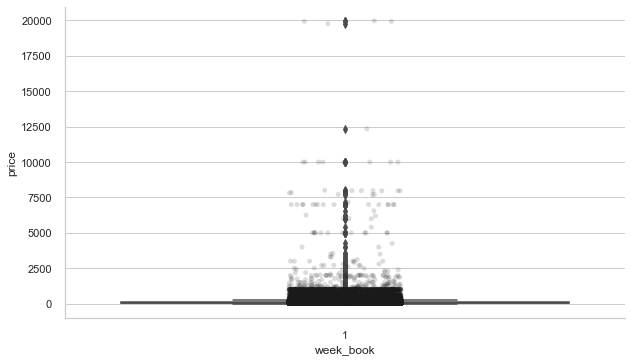

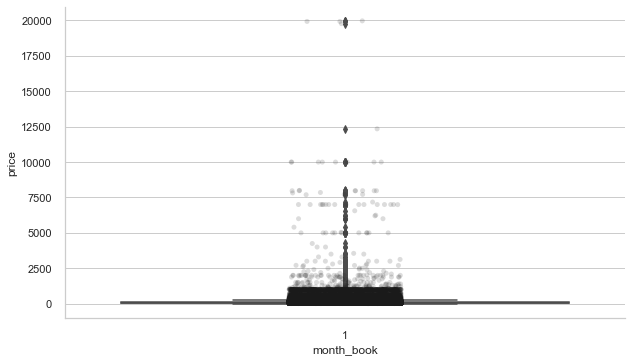

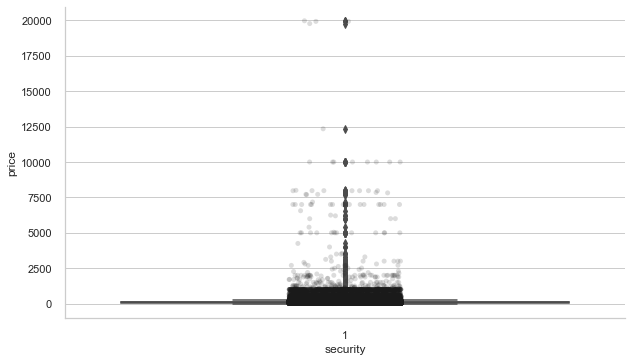

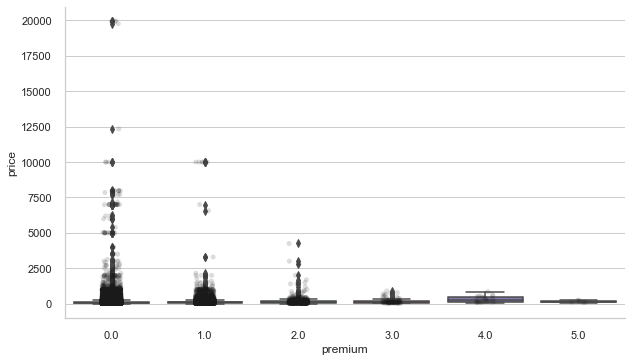

In [21]:
for var in discrete_vars:
    sns.catplot(x=var, y='price', data=data_df, kind="box", height=5, aspect=1.75)
    sns.stripplot(x=var, y='price', data=data_df, jitter=0.1, alpha=0.15, color='k')
    plt.show()

## FEATURE ENGINEERING